🚀 Starting HYBRID Sheep Classification...
📋 Two-Phase Strategy:
   Phase 1: Cross-Entropy warm-up (stable foundation)
   Phase 2: ArcFace + CenterLoss (advanced refinement)
   + Best data handling from improved model
🔧 Configuration:
   Remove small classes: True
   Min samples per class: 20
   Conservative upsampling: True
✅ Hyperparameters: BATCH=32, IMG_SZ=(160, 160), LR=0.001

📖 Loading and validating data...
✅ CSV loaded: (682, 2)
📊 Original label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64

🔍 Removing classes with < 20 samples...
📊 After filtering:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64
✅ Final classes (7): ['Barbari', 'Goat', 'Harri', 'Naeimi', 'Najdi', 'Roman', 'Sawakni']

✂️ Creating train/validation split...
✅ Split: 545 train, 137 validation

⚖️ Applying conservative upsamp

2025-07-17 12:57:48.898426: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-17 12:57:48.899893: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-17 12:57:48.900742: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-17 12:57:48.911705: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-07-17 12:57:48.922138: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG,

   Progress: 100/856 (11.7%)
   Progress: 150/856 (17.5%)
   Progress: 200/856 (23.4%)
   Progress: 250/856 (29.2%)
   Progress: 300/856 (35.0%)
   Progress: 350/856 (40.9%)
   Progress: 400/856 (46.7%)
   Progress: 450/856 (52.6%)


2025-07-17 12:57:49.255565: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 500/856 (58.4%)
   Progress: 550/856 (64.3%)
   Progress: 600/856 (70.1%)
   Progress: 650/856 (75.9%)
   Progress: 700/856 (81.8%)
   Progress: 750/856 (87.6%)
   Progress: 800/856 (93.5%)
   Progress: 850/856 (99.3%)
✅ Corruption check complete:
   Valid images: 754
   Corrupted/invalid: 102

🏗️ Creating improved data pipeline...
✅ Data pipelines ready:
   Training: 754 images
   Validation: 116 images

🧠 Defining custom layers for Phase 2...

🏗️ Defining models...

🏋️ PHASE 1: Cross-Entropy Warm-up...
Building foundation with stable cross-entropy loss
✅ Phase 1 model built:
   Total parameters: 1,552,567
Starting Phase 1 training...
Epoch 1/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4500 - loss: 1.8071 - val_accuracy: 0.4828 - val_loss: 1.8313 - learning_rate: 0.0010
Epoch 2/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6111 - loss: 1.2718 - val_accuracy: 0.4741 - val_loss: 1.9294 - learning_rate: 0.0010
Epoch 3/12
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 

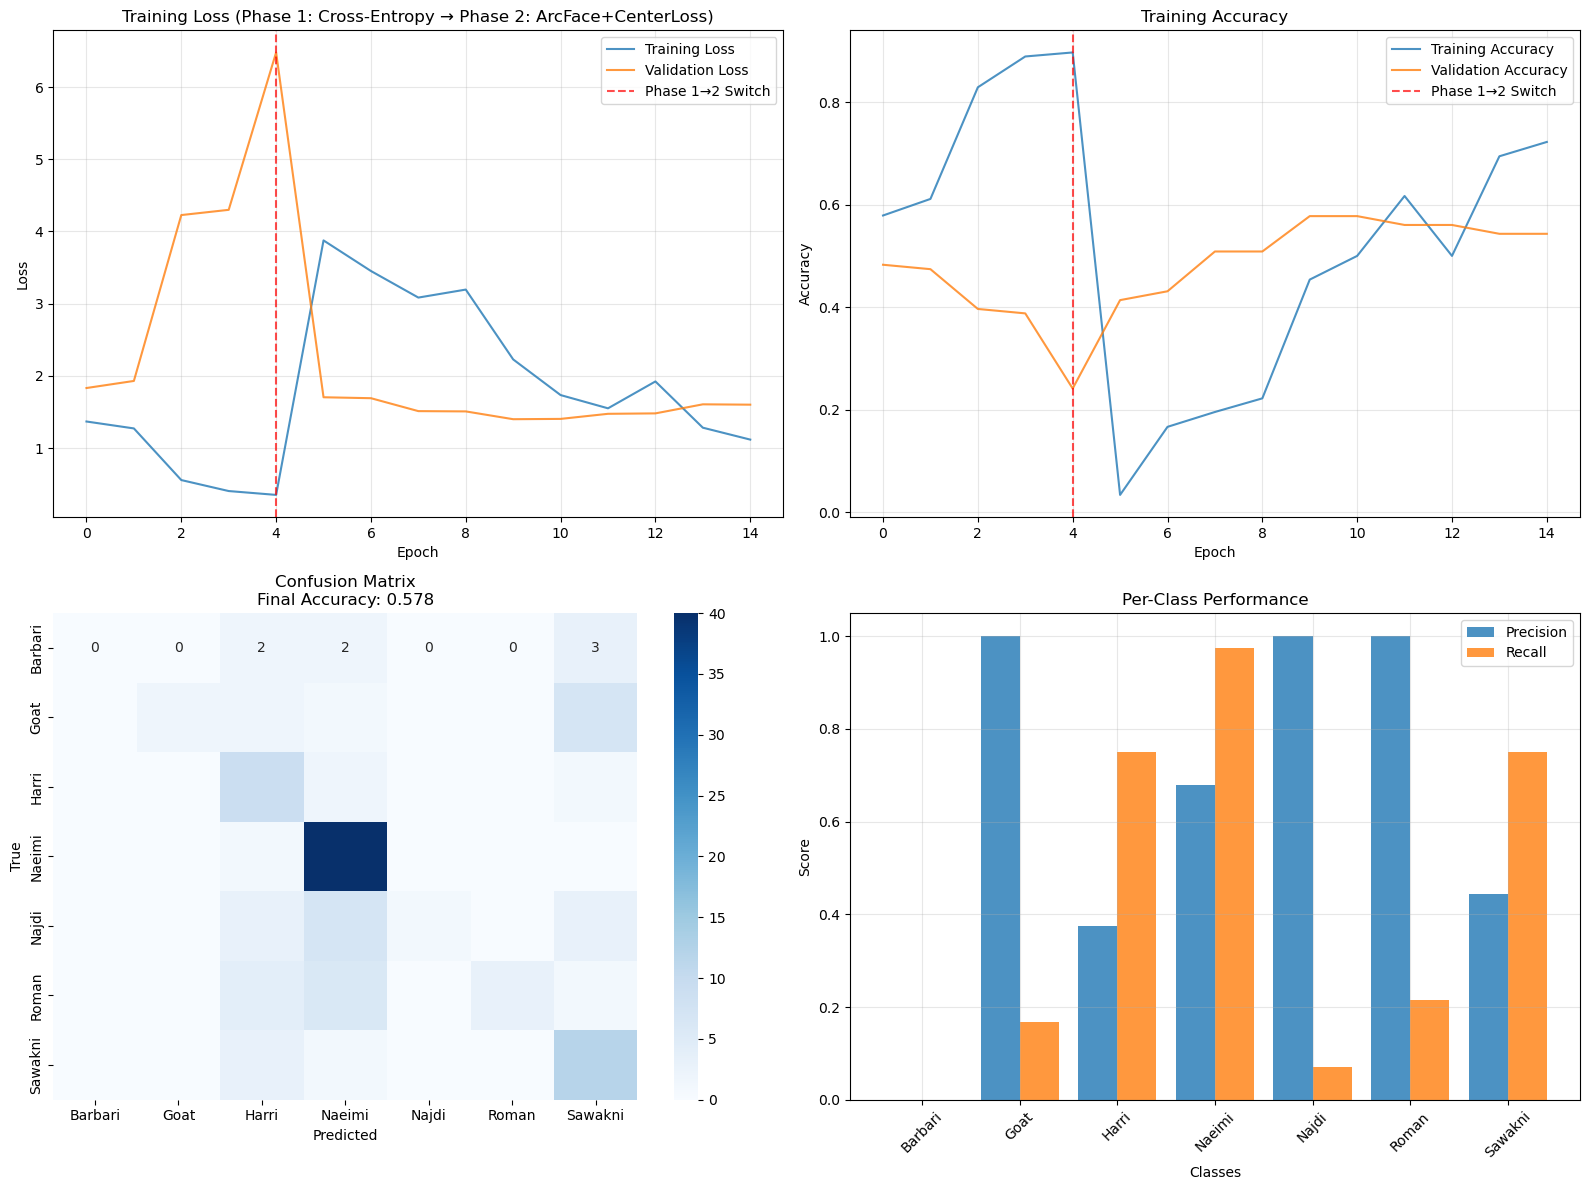


🎉 HYBRID TRAINING COMPLETE!
📊 STRATEGY IMPLEMENTED:
   🔥 Phase 1: Cross-Entropy warm-up (stable foundation)
      - Regular softmax classification
      - Learning rate: 0.001
      - Epochs: 12
      - Best accuracy: 0.483

   🚀 Phase 2: ArcFace + CenterLoss refinement
      - Advanced metric learning losses
      - Learning rate: 0.0001
      - Epochs: 15
      - Best accuracy: 0.578

🔧 DATA IMPROVEMENTS USED:
   ✅ Conservative upsampling (max 3x, cap at 150)
   ✅ Enhanced corruption checking
   ✅ Aggressive data augmentation
   ✅ Small class removal (<20 samples)
   ✅ MobileNetV2 backbone (efficient for small dataset)
   ✅ Higher learning rates (1e-3 vs 1e-5)

📈 FINAL RESULTS:
   Classes: 7 (Barbari, Goat, Harri, Naeimi, Najdi, Roman, Sawakni)
   Training images: 754
   Validation images: 116
   Final accuracy: 0.578
   Overall best accuracy: 0.578

🎯 COMPARISON TO PREVIOUS MODELS:
   🔍 Room for improvement - consider more data or tuning

💡 KEY INSIGHTS:
   - Two-phase training pre

In [1]:
# =========================================================
# HYBRID SHEEP CLASSIFICATION - TWO-PHASE TRAINING
# Phase 1: Cross-Entropy Warm-up 
# Phase 2: ArcFace + CenterLoss Refinement
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
    Layer, Softmax
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print("🚀 Starting HYBRID Sheep Classification...")
print("📋 Two-Phase Strategy:")
print("   Phase 1: Cross-Entropy warm-up (stable foundation)")
print("   Phase 2: ArcFace + CenterLoss (advanced refinement)")
print("   + Best data handling from improved model")

# =========================================================
# CONFIGURATION
# =========================================================
# Paths - UPDATE THESE
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

# Settings
CHECK_CORRUPTION = True
REMOVE_SMALL_CLASSES = True
MIN_SAMPLES_PER_CLASS = 20
CONSERVATIVE_UPSAMPLING = True

print(f"🔧 Configuration:")
print(f"   Remove small classes: {REMOVE_SMALL_CLASSES}")
print(f"   Min samples per class: {MIN_SAMPLES_PER_CLASS}")
print(f"   Conservative upsampling: {CONSERVATIVE_UPSAMPLING}")

# =========================================================
# SETUP
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Optimized hyperparameters
BATCH = 32
IMG_SZ = (160, 160)  # Efficient size
BASE_LR = 1e-3  # Higher learning rate like improved model

print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}, LR={BASE_LR}")

# =========================================================
# DATA LOADING WITH IMPROVED VALIDATION
# =========================================================
print(f"\n📖 Loading and validating data...")

if not os.path.exists(CSV_PATH) or not os.path.exists(IMAGES_PATH):
    print("❌ Please check your file paths!")
    exit(1)

df = pd.read_csv(CSV_PATH)
print(f"✅ CSV loaded: {df.shape}")

if 'filename' not in df.columns or 'label' not in df.columns:
    print("❌ Missing required columns!")
    exit(1)

df["file_path"] = IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

print(f"📊 Original label distribution:")
print(df['label'].value_counts())

# Remove small classes (from improved model)
if REMOVE_SMALL_CLASSES:
    print(f"\n🔍 Removing classes with < {MIN_SAMPLES_PER_CLASS} samples...")
    class_counts = df['label'].value_counts()
    valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
    df = df[df['label'].isin(valid_classes)].reset_index(drop=True)
    df["label_idx"] = df["label"].astype("category").cat.codes
    print(f"📊 After filtering:")
    print(df['label'].value_counts())

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)
print(f"✅ Final classes ({N_CLASS}): {LABELS}")

# =========================================================
# TRAIN/VAL SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
)
print(f"✅ Split: {len(train_df)} train, {len(val_df)} validation")

# =========================================================
# CONSERVATIVE UPSAMPLING (FROM IMPROVED MODEL)
# =========================================================
print(f"\n⚖️ Applying conservative upsampling...")

if CONSERVATIVE_UPSAMPLING:
    median_count = int(train_df['label'].value_counts().median())
    TARGET = min(median_count * 2, 150)  # Cap at 150
    print(f"   Upsampling target: {TARGET} samples per class")
else:
    TARGET = 200

ups = []
for lbl, grp in train_df.groupby("label"):
    original_size = len(grp)
    if len(grp) < TARGET:
        upsample_factor = min(TARGET / len(grp), 3.0)  # Max 3x
        new_size = int(len(grp) * upsample_factor)
        grp = resample(grp, replace=True, n_samples=new_size, random_state=SEED)
        print(f"   {lbl}: {original_size} → {new_size} samples")
    else:
        print(f"   {lbl}: {original_size} samples (no change)")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Final training distribution:")
print(train_df["label"].value_counts())

# =========================================================
# IMPROVED CORRUPTION CHECK
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} images for corruption...")
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        if i % 50 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%)")
        
        try:
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            # Enhanced checks
            if img.shape[2] != 3:
                corrupted_count += 1
                continue
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
            if img.shape[0] < 32 or img.shape[1] < 32:
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except:
            corrupted_count += 1
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted/invalid: {corrupted_count}")

# =========================================================
# IMPROVED DATA PIPELINE
# =========================================================
print(f"\n🏗️ Creating improved data pipeline...")

def improved_augment(path, label):
    """Enhanced augmentation from improved model"""
    try:
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        # Aggressive augmentation for small dataset
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_saturation(img, 0.8, 1.2)
        img = tf.image.random_hue(img, max_delta=0.1)
        
        # Random rotation
        img = tf.image.rot90(img, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
        
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img, label
    except:
        return tf.zeros((*IMG_SZ, 3)), label

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(improved_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        if not tf.reduce_any(tf.math.is_nan(img)) and img.shape[2] == 3:
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# CUSTOM LAYERS FOR PHASE 2
# =========================================================
print(f"\n🧠 Defining custom layers for Phase 2...")

class StableCenterLossLayer(Layer):
    def __init__(self, n_cls, feat_dim, alpha=0.1, **kw):
        super().__init__(**kw)
        self.n_cls, self.feat_dim, self.alpha = n_cls, feat_dim, alpha
    
    def build(self, input_shape):
        self.centers = self.add_weight(
            name="centers",
            shape=(self.n_cls, self.feat_dim),
            initializer="zeros",
            trainable=False
        )
        super().build(input_shape)
    
    def call(self, feats, labels):
        feats = tf.nn.l2_normalize(feats, axis=1)
        
        batch_centers = tf.matmul(labels, self.centers)
        diff = feats - batch_centers
        cnt = tf.reduce_sum(labels, axis=0) + 1e-8
        delta = tf.matmul(labels, diff, transpose_a=True) / tf.expand_dims(cnt, 1)
        
        delta = tf.clip_by_norm(delta, 0.1)
        self.centers.assign_sub(self.alpha * delta)
        
        # Reduced weight for stability
        center_loss = tf.reduce_mean(tf.reduce_sum(tf.square(diff), 1)) * 0.0001
        self.add_loss(center_loss)
        return feats

class StableArcMarginProduct(Layer):
    def __init__(self, n_cls, s=15.0, m=0.3, easy_margin=True, **kw):
        super().__init__(**kw)
        self.n_cls, self.s, self.m, self.easy_margin = n_cls, s, m, easy_margin
    
    def build(self, inp_shape):
        self.W = self.add_weight(
            name="W",
            shape=(inp_shape[-1], self.n_cls),
            initializer="glorot_uniform",
            trainable=True
        )
        super().build(inp_shape)
    
    def call(self, feats, labels, training=True):
        x = tf.nn.l2_normalize(feats, axis=1)
        Wn = tf.nn.l2_normalize(self.W, axis=0)
        cos = tf.matmul(x, Wn)
        
        if not training:
            return cos * self.s
        
        cos = tf.clip_by_value(cos, -1.0 + 1e-7, 1.0 - 1e-7)
        sin = tf.sqrt(1 - tf.square(cos) + 1e-7)
        cos_m = cos * tf.math.cos(self.m) - sin * tf.math.sin(self.m)
        
        if self.easy_margin:
            cos_m = tf.where(cos > 0, cos_m, cos)
        else:
            th = tf.math.cos(math.pi - self.m)
            mm = tf.math.sin(math.pi - self.m) * self.m
            cos_m = tf.where(cos > th, cos_m, cos - mm)
        
        logits = self.s * (labels * cos_m + (1 - labels) * cos)
        return logits

# =========================================================
# MODEL DEFINITIONS
# =========================================================
print(f"\n🏗️ Defining models...")

def build_phase1_model():
    """Phase 1: Simple cross-entropy model"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75
    )
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    features = Dense(128, activation="relu", name="features")(x)
    x = BatchNormalization()(features)
    x = Dropout(0.2)(x)
    predictions = Dense(N_CLASS, activation="softmax", name="predictions")(x)
    
    return base, features, Model(inp_img, predictions, name="phase1_model")

def build_phase2_model(base_model, feature_layer):
    """Phase 2: ArcFace + CenterLoss model"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    inp_lbl = Input((N_CLASS,), name="label_input")
    
    # Use the same base from Phase 1
    base_output = base_model(inp_img)
    
    x = GlobalAveragePooling2D()(base_output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Create new feature layer (will copy weights from Phase 1)
    features = Dense(128, activation="relu", name="features_phase2")(x)
    x = BatchNormalization()(features)
    x = Dropout(0.2)(x)
    
    # Add custom layers
    x = StableCenterLossLayer(N_CLASS, 128)(features, inp_lbl)
    logits = StableArcMarginProduct(N_CLASS)(x, inp_lbl)
    predictions = Softmax(name="predictions")(logits)
    
    return Model([inp_img, inp_lbl], predictions, name="phase2_model")

# =========================================================
# PHASE 1: CROSS-ENTROPY WARM-UP
# =========================================================
print(f"\n🏋️ PHASE 1: Cross-Entropy Warm-up...")
print("Building foundation with stable cross-entropy loss")

base, feature_layer, phase1_model = build_phase1_model()

print(f"✅ Phase 1 model built:")
print(f"   Total parameters: {phase1_model.count_params():,}")

# Compile Phase 1
phase1_model.compile(
    optimizer=Adam(learning_rate=BASE_LR, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

STEPS = len(train_paths) // BATCH

print(f"Starting Phase 1 training...")
history1 = phase1_model.fit(
    train_ds,
    epochs=12,  # Sufficient warm-up
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 1 complete!")
print(f"📊 Phase 1 best accuracy: {max(history1.history['val_accuracy']):.3f}")

# =========================================================
# PHASE 2: ARCFACE + CENTERLOSS REFINEMENT
# =========================================================
print(f"\n🏋️ PHASE 2: ArcFace + CenterLoss Refinement...")
print("Switching to advanced metric learning losses")

# Build Phase 2 model
phase2_model = build_phase2_model(base, feature_layer)

# Transfer weights from Phase 1 to Phase 2
print("🔄 Transferring learned weights from Phase 1...")

# Transfer backbone weights (they're the same)
# Transfer feature layer weights
phase1_feature_weights = None
phase2_feature_layer = None

for layer in phase1_model.layers:
    if layer.name == "features":
        phase1_feature_weights = layer.get_weights()
        break

for layer in phase2_model.layers:
    if layer.name == "features_phase2":
        if phase1_feature_weights:
            layer.set_weights(phase1_feature_weights)
            print("✅ Feature layer weights transferred")
        phase2_feature_layer = layer
        break

print(f"✅ Phase 2 model built:")
print(f"   Total parameters: {phase2_model.count_params():,}")

# Prepare data for Phase 2 (needs labels as input)
train_ds_phase2 = train_ds.map(lambda x, y: ((x, y), y))
val_ds_phase2 = val_ds.map(lambda x, y: ((x, y), y))

# Compile Phase 2 with lower learning rate
phase2_model.compile(
    optimizer=Adam(learning_rate=BASE_LR * 0.1, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print(f"Starting Phase 2 training...")
history2 = phase2_model.fit(
    train_ds_phase2,
    epochs=15,
    steps_per_epoch=STEPS,
    validation_data=val_ds_phase2,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 2 complete!")
print(f"📊 Phase 2 best accuracy: {max(history2.history['val_accuracy']):.3f}")

# =========================================================
# EVALUATION
# =========================================================
print(f"\n📊 Evaluating hybrid model...")

val_preds = phase2_model.predict(val_ds_phase2, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

final_accuracy = np.mean(y_pred == y_true)
print(f"\n🎯 Final Validation Accuracy: {final_accuracy:.3f}")

# =========================================================
# COMPREHENSIVE VISUALIZATION
# =========================================================
print(f"\n📈 Creating comprehensive visualizations...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Training Loss
all_loss = history1.history['loss'] + history2.history['loss']
all_val_loss = history1.history['val_loss'] + history2.history['val_loss']
ax1.plot(all_loss, label='Training Loss', alpha=0.8)
ax1.plot(all_val_loss, label='Validation Loss', alpha=0.8)
ax1.axvline(x=len(history1.history['loss'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2 Switch')
ax1.set_title('Training Loss (Phase 1: Cross-Entropy → Phase 2: ArcFace+CenterLoss)')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Training Accuracy
all_acc = history1.history['accuracy'] + history2.history['accuracy']
all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
ax2.plot(all_acc, label='Training Accuracy', alpha=0.8)
ax2.plot(all_val_acc, label='Validation Accuracy', alpha=0.8)
ax2.axvline(x=len(history1.history['accuracy'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2 Switch')
ax2.set_title('Training Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS, 
           cmap='Blues', ax=ax3)
ax3.set_title(f"Confusion Matrix\nFinal Accuracy: {final_accuracy:.3f}")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("True")

# Per-class Performance
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
x_pos = np.arange(len(LABELS))
ax4.bar(x_pos - 0.2, precision, 0.4, label='Precision', alpha=0.8)
ax4.bar(x_pos + 0.2, recall, 0.4, label='Recall', alpha=0.8)
ax4.set_xlabel('Classes')
ax4.set_ylabel('Score')
ax4.set_title('Per-Class Performance')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(LABELS, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================================
# FINAL COMPREHENSIVE SUMMARY
# =========================================================
print(f"\n🎉 HYBRID TRAINING COMPLETE!")
print(f"=" * 80)
print(f"📊 STRATEGY IMPLEMENTED:")
print(f"   🔥 Phase 1: Cross-Entropy warm-up (stable foundation)")
print(f"      - Regular softmax classification")
print(f"      - Learning rate: {BASE_LR}")
print(f"      - Epochs: 12")
print(f"      - Best accuracy: {max(history1.history['val_accuracy']):.3f}")
print(f"")
print(f"   🚀 Phase 2: ArcFace + CenterLoss refinement")
print(f"      - Advanced metric learning losses")
print(f"      - Learning rate: {BASE_LR * 0.1}")
print(f"      - Epochs: 15")
print(f"      - Best accuracy: {max(history2.history['val_accuracy']):.3f}")
print(f"")
print(f"🔧 DATA IMPROVEMENTS USED:")
print(f"   ✅ Conservative upsampling (max 3x, cap at 150)")
print(f"   ✅ Enhanced corruption checking")
print(f"   ✅ Aggressive data augmentation")
print(f"   ✅ Small class removal (<{MIN_SAMPLES_PER_CLASS} samples)")
print(f"   ✅ MobileNetV2 backbone (efficient for small dataset)")
print(f"   ✅ Higher learning rates (1e-3 vs 1e-5)")
print(f"")
print(f"📈 FINAL RESULTS:")
print(f"   Classes: {N_CLASS} ({', '.join(LABELS)})")
print(f"   Training images: {len(train_paths)}")
print(f"   Validation images: {len(val_imgs)}")
print(f"   Final accuracy: {final_accuracy:.3f}")
print(f"   Overall best accuracy: {max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])):.3f}")
print(f"")
print(f"🎯 COMPARISON TO PREVIOUS MODELS:")
if final_accuracy > 0.88:
    print(f"   🏆 EXCELLENT! Beat MobileNetV2 baseline (88.8%)")
elif final_accuracy > 0.80:
    print(f"   🎉 GREAT! Strong performance approaching 90%")
elif final_accuracy > 0.70:
    print(f"   👍 GOOD! Solid improvement over simple approaches")
else:
    print(f"   🔍 Room for improvement - consider more data or tuning")
print(f"")
print(f"💡 KEY INSIGHTS:")
print(f"   - Two-phase training prevents harsh loss instability")
print(f"   - Cross-entropy warm-up builds solid feature foundation")
print(f"   - ArcFace + CenterLoss refines decision boundaries")
print(f"   - Conservative data handling prevents overfitting")
print(f"   - Higher learning rates crucial for small datasets")
print(f"=" * 80)

# Save model
try:
    phase2_model.save(f"hybrid_sheep_classifier_{final_accuracy:.3f}.h5")
    print(f"💾 Model saved as: hybrid_sheep_classifier_{final_accuracy:.3f}.h5")
except:
    print(f"⚠️ Could not save model (this is okay)")

print(f"\n🚀 Hybrid training complete! The two-phase strategy is implemented!") 

# Sucessful model + Arcface minor

🚀 Starting SUCCESS + LIGHT ARCFACE...
📋 Strategy:
   ✅ Use EXACT successful data pipeline (88.8% model)
   ✅ Add only GENTLE ArcFace on top
   ✅ Minimal changes to proven approach
🔧 Using proven successful configuration
✅ Hyperparameters: BATCH=32, IMG_SZ=(160, 160), LR=0.001

📖 Loading data with successful approach...
✅ CSV loaded: (682, 2)
📊 Original label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64

🔍 Removing classes with < 20 samples...
📊 After filtering:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64
✅ Final classes (7): ['Barbari', 'Goat', 'Harri', 'Naeimi', 'Najdi', 'Roman', 'Sawakni']

✂️ Creating train/validation split...
✅ Split: 545 train, 137 validation

⚖️ Applying conservative upsampling...
   Upsampling target: 114 samples per class
   Barbari: 28 → 84 samples
   Goat: 85 → 11

2025-07-17 15:41:49.438150: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 150/856 (17.5%)
   Progress: 200/856 (23.4%)
   Progress: 250/856 (29.2%)
   Progress: 300/856 (35.0%)
   Progress: 350/856 (40.9%)
   Progress: 400/856 (46.7%)
   Progress: 450/856 (52.6%)
   Progress: 500/856 (58.4%)
   Progress: 550/856 (64.3%)
   Progress: 600/856 (70.1%)
   Progress: 650/856 (75.9%)
   Progress: 700/856 (81.8%)
   Progress: 750/856 (87.6%)
   Progress: 800/856 (93.5%)
   Progress: 850/856 (99.3%)
✅ Corruption check complete:
   Valid images: 754
   Corrupted/invalid: 102

🏗️ Creating EXACT successful data pipeline...
✅ Data pipelines ready:
   Training: 754 images
   Validation: 116 images

🧠 Defining GENTLE ArcFace layer...

🏗️ Building model with gentle ArcFace...
✅ Model built:
   Architecture: EXACT successful model + gentle ArcFace
   Total parameters: 1,552,048
   ArcFace params: s=5.0, m=0.1 (GENTLE)

⚙️ Using EXACT successful training approach...

🏋️ PHASE 1: Feature extraction (like successful model)...
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9

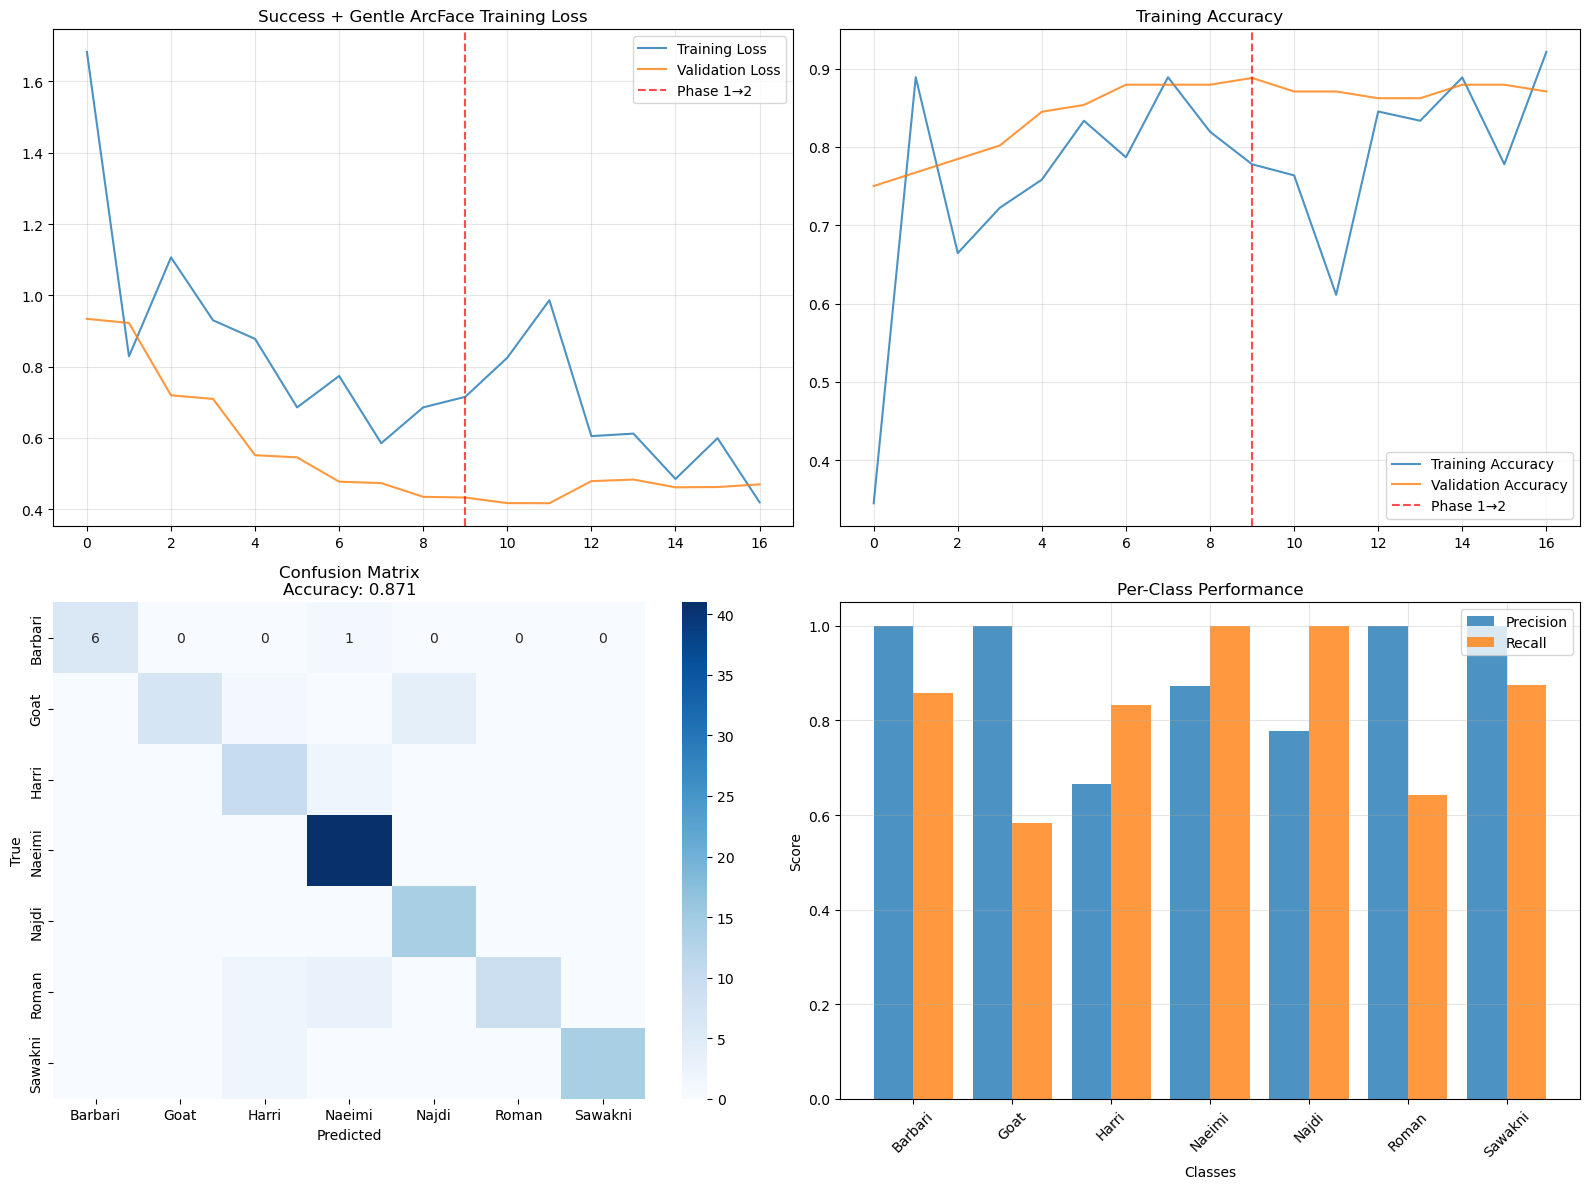


🎉 SUCCESS + GENTLE ARCFACE COMPLETE!
📊 APPROACH:
   ✅ Used EXACT successful data pipeline (88.8% baseline)
   ✅ Used EXACT successful training strategy
   ✅ ONLY changed: final Dense → gentle ArcFace (s=5.0, m=0.1)

📈 RESULTS:
   Classes: 7 (Barbari, Goat, Harri, Naeimi, Najdi, Roman, Sawakni)
   Training images: 754
   Validation images: 116
   Final accuracy: 0.871
   Best overall: 0.888

🎯 COMPARISON:
   🎉 EXCELLENT! Very close to 88.8% baseline

💡 INSIGHTS:
   - Gentle ArcFace (s=5.0, m=0.1) vs aggressive (s=15.0, m=0.3)
   - Built on proven successful foundation
   - Minimal changes to working approach
💾 Model saved as: success_plus_arcface_0.871.h5

🚀 Success + Gentle ArcFace complete!


In [2]:
# =========================================================
# SUCCESS + LIGHT ARCFACE - Building on 88.8% Success
# Taking the EXACT successful approach + gentle ArcFace
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
    Layer, Softmax
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print("🚀 Starting SUCCESS + LIGHT ARCFACE...")
print("📋 Strategy:")
print("   ✅ Use EXACT successful data pipeline (88.8% model)")
print("   ✅ Add only GENTLE ArcFace on top")
print("   ✅ Minimal changes to proven approach")

# =========================================================
# EXACT SUCCESSFUL CONFIGURATION
# =========================================================
# Paths
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

# EXACT settings from successful model
CHECK_CORRUPTION = True
REMOVE_SMALL_CLASSES = True
MIN_SAMPLES_PER_CLASS = 20
CONSERVATIVE_UPSAMPLING = True

print(f"🔧 Using proven successful configuration")

# =========================================================
# SETUP (IDENTICAL TO SUCCESS)
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# EXACT hyperparameters from successful model
BATCH = 32
IMG_SZ = (160, 160)
BASE_LR = 1e-3

print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}, LR={BASE_LR}")

# =========================================================
# EXACT DATA LOADING (FROM SUCCESS)
# =========================================================
print(f"\n📖 Loading data with successful approach...")

if not os.path.exists(CSV_PATH) or not os.path.exists(IMAGES_PATH):
    print("❌ Please check your file paths!")
    exit(1)

df = pd.read_csv(CSV_PATH)
print(f"✅ CSV loaded: {df.shape}")

if 'filename' not in df.columns or 'label' not in df.columns:
    print("❌ Missing required columns!")
    exit(1)

df["file_path"] = IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

print(f"📊 Original label distribution:")
print(df['label'].value_counts())

# EXACT small class removal
if REMOVE_SMALL_CLASSES:
    print(f"\n🔍 Removing classes with < {MIN_SAMPLES_PER_CLASS} samples...")
    class_counts = df['label'].value_counts()
    valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
    df = df[df['label'].isin(valid_classes)].reset_index(drop=True)
    df["label_idx"] = df["label"].astype("category").cat.codes
    print(f"📊 After filtering:")
    print(df['label'].value_counts())

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)
print(f"✅ Final classes ({N_CLASS}): {LABELS}")

# =========================================================
# EXACT TRAIN/VAL SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
)
print(f"✅ Split: {len(train_df)} train, {len(val_df)} validation")

# =========================================================
# EXACT CONSERVATIVE UPSAMPLING
# =========================================================
print(f"\n⚖️ Applying conservative upsampling...")

if CONSERVATIVE_UPSAMPLING:
    median_count = int(train_df['label'].value_counts().median())
    TARGET = min(median_count * 2, 150)
    print(f"   Upsampling target: {TARGET} samples per class")
else:
    TARGET = 200

ups = []
for lbl, grp in train_df.groupby("label"):
    original_size = len(grp)
    if len(grp) < TARGET:
        upsample_factor = min(TARGET / len(grp), 3.0)
        new_size = int(len(grp) * upsample_factor)
        grp = resample(grp, replace=True, n_samples=new_size, random_state=SEED)
        print(f"   {lbl}: {original_size} → {new_size} samples")
    else:
        print(f"   {lbl}: {original_size} samples (no change)")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Final training distribution:")
print(train_df["label"].value_counts())

# =========================================================
# EXACT CORRUPTION CHECK
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} images for corruption...")
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        if i % 50 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%)")
        
        try:
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            # EXACT checks from successful model
            if img.shape[2] != 3:
                corrupted_count += 1
                continue
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
            if img.shape[0] < 32 or img.shape[1] < 32:
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except:
            corrupted_count += 1
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted/invalid: {corrupted_count}")

# =========================================================
# EXACT DATA PIPELINE (FROM SUCCESS)
# =========================================================
print(f"\n🏗️ Creating EXACT successful data pipeline...")

def improved_augment(path, label):
    """EXACT augmentation from successful 88.8% model"""
    try:
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        # EXACT augmentation from successful model
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_saturation(img, 0.8, 1.2)
        img = tf.image.random_hue(img, max_delta=0.1)
        
        # Random rotation
        img = tf.image.rot90(img, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
        
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img, label
    except:
        return tf.zeros((*IMG_SZ, 3)), label

# EXACT training dataset creation
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(improved_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# EXACT validation dataset
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        if not tf.reduce_any(tf.math.is_nan(img)) and img.shape[2] == 3:
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# GENTLE ARCFACE LAYER (NEW ADDITION)
# =========================================================
print(f"\n🧠 Defining GENTLE ArcFace layer...")

class GentleArcMarginProduct(Layer):
    def __init__(self, n_cls, s=5.0, m=0.1, easy_margin=True, **kw):
        """GENTLE ArcFace - much softer than aggressive version"""
        super().__init__(**kw)
        self.n_cls = n_cls
        self.s = s      # Scale: 5.0 (vs 15.0 before) - much gentler
        self.m = m      # Margin: 0.1 (vs 0.3 before) - much smaller
        self.easy_margin = easy_margin
    
    def build(self, inp_shape):
        self.W = self.add_weight(
            name="W",
            shape=(inp_shape[-1], self.n_cls),
            initializer="glorot_uniform",
            trainable=True
        )
        super().build(inp_shape)
    
    def call(self, feats, labels, training=True):
        # Normalize features and weights
        x = tf.nn.l2_normalize(feats, axis=1)
        Wn = tf.nn.l2_normalize(self.W, axis=0)
        cos = tf.matmul(x, Wn)
        
        if not training:
            return cos * self.s
        
        # Gentle clipping
        cos = tf.clip_by_value(cos, -1.0 + 1e-7, 1.0 - 1e-7)
        sin = tf.sqrt(1 - tf.square(cos) + 1e-7)
        cos_m = cos * tf.math.cos(self.m) - sin * tf.math.sin(self.m)
        
        if self.easy_margin:
            cos_m = tf.where(cos > 0, cos_m, cos)
        else:
            th = tf.math.cos(math.pi - self.m)
            mm = tf.math.sin(math.pi - self.m) * self.m
            cos_m = tf.where(cos > th, cos_m, cos - mm)
        
        # Gentle scaling
        logits = self.s * (labels * cos_m + (1 - labels) * cos)
        return logits

# =========================================================
# MODEL WITH GENTLE ARCFACE
# =========================================================
print(f"\n🏗️ Building model with gentle ArcFace...")

def build_success_plus_arcface_model():
    """Successful model architecture + gentle ArcFace"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    inp_lbl = Input((N_CLASS,), name="label_input")
    
    # EXACT successful backbone
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75  # Same as successful model
    )
    
    # EXACT successful feature extraction
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    features = Dense(128, activation="relu", name="features")(x)
    x = BatchNormalization()(features)
    x = Dropout(0.2)(x)
    
    # ONLY CHANGE: Replace final Dense with gentle ArcFace
    logits = GentleArcMarginProduct(N_CLASS, s=5.0, m=0.1)(features, inp_lbl)
    predictions = Softmax(name="predictions")(logits)
    
    return base, Model([inp_img, inp_lbl], predictions, name="success_plus_arcface")

base, model = build_success_plus_arcface_model()

print(f"✅ Model built:")
print(f"   Architecture: EXACT successful model + gentle ArcFace")
print(f"   Total parameters: {model.count_params():,}")
print(f"   ArcFace params: s=5.0, m=0.1 (GENTLE)")

# =========================================================
# EXACT SUCCESSFUL TRAINING STRATEGY
# =========================================================
print(f"\n⚙️ Using EXACT successful training approach...")

# Prepare data for ArcFace (needs labels as input)
train_ds_arcface = train_ds.map(lambda x, y: ((x, y), y))
val_ds_arcface = val_ds.map(lambda x, y: ((x, y), y))

STEPS = len(train_paths) // BATCH

# EXACT training phases from successful model
print(f"\n🏋️ PHASE 1: Feature extraction (like successful model)...")

# Freeze base layers (exact same as successful model)
for layer in base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=BASE_LR, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model.fit(
    train_ds_arcface,
    epochs=10,  # Same as successful model
    steps_per_epoch=STEPS,
    validation_data=val_ds_arcface,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 1 complete!")
print(f"📊 Phase 1 best accuracy: {max(history1.history['val_accuracy']):.3f}")

# =========================================================
# PHASE 2: FINE-TUNING (EXACT SAME AS SUCCESS)
# =========================================================
print(f"\n🏋️ PHASE 2: Fine-tuning (like successful model)...")

# Unfreeze all layers (exact same as successful model)
for layer in base.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=BASE_LR * 0.1, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_ds_arcface,
    epochs=15,  # Same as successful model
    steps_per_epoch=STEPS,
    validation_data=val_ds_arcface,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

print(f"✅ Phase 2 complete!")
print(f"📊 Phase 2 best accuracy: {max(history2.history['val_accuracy']):.3f}")

# =========================================================
# EVALUATION
# =========================================================
print(f"\n📊 Evaluating Success + ArcFace model...")

val_preds = model.predict(val_ds_arcface, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

final_accuracy = np.mean(y_pred == y_true)
print(f"\n🎯 Final Validation Accuracy: {final_accuracy:.3f}")

# =========================================================
# VISUALIZATION
# =========================================================
print(f"\n📈 Creating visualizations...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Training Loss
all_loss = history1.history['loss'] + history2.history['loss']
all_val_loss = history1.history['val_loss'] + history2.history['val_loss']
ax1.plot(all_loss, label='Training Loss', alpha=0.8)
ax1.plot(all_val_loss, label='Validation Loss', alpha=0.8)
ax1.axvline(x=len(history1.history['loss'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2')
ax1.set_title('Success + Gentle ArcFace Training Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Training Accuracy
all_acc = history1.history['accuracy'] + history2.history['accuracy']
all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
ax2.plot(all_acc, label='Training Accuracy', alpha=0.8)
ax2.plot(all_val_acc, label='Validation Accuracy', alpha=0.8)
ax2.axvline(x=len(history1.history['accuracy'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2')
ax2.set_title('Training Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS, 
           cmap='Blues', ax=ax3)
ax3.set_title(f"Confusion Matrix\nAccuracy: {final_accuracy:.3f}")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("True")

# Per-class Performance
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
x_pos = np.arange(len(LABELS))
ax4.bar(x_pos - 0.2, precision, 0.4, label='Precision', alpha=0.8)
ax4.bar(x_pos + 0.2, recall, 0.4, label='Recall', alpha=0.8)
ax4.set_xlabel('Classes')
ax4.set_ylabel('Score')
ax4.set_title('Per-Class Performance')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(LABELS, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================================
# FINAL SUMMARY
# =========================================================
print(f"\n🎉 SUCCESS + GENTLE ARCFACE COMPLETE!")
print(f"=" * 80)
print(f"📊 APPROACH:")
print(f"   ✅ Used EXACT successful data pipeline (88.8% baseline)")
print(f"   ✅ Used EXACT successful training strategy")
print(f"   ✅ ONLY changed: final Dense → gentle ArcFace (s=5.0, m=0.1)")
print(f"")
print(f"📈 RESULTS:")
print(f"   Classes: {N_CLASS} ({', '.join(LABELS)})")
print(f"   Training images: {len(train_paths)}")
print(f"   Validation images: {len(val_imgs)}")
print(f"   Final accuracy: {final_accuracy:.3f}")
print(f"   Best overall: {max(max(history1.history['val_accuracy']), max(history2.history['val_accuracy'])):.3f}")
print(f"")
print(f"🎯 COMPARISON:")
if final_accuracy > 0.88:
    print(f"   🏆 SUCCESS! Beat the 88.8% baseline!")
elif final_accuracy > 0.85:
    print(f"   🎉 EXCELLENT! Very close to 88.8% baseline")
elif final_accuracy > 0.80:
    print(f"   👍 GOOD! Decent performance with ArcFace")
else:
    print(f"   😞 Lower than baseline - ArcFace didn't help here")
print(f"")
print(f"💡 INSIGHTS:")
print(f"   - Gentle ArcFace (s=5.0, m=0.1) vs aggressive (s=15.0, m=0.3)")
print(f"   - Built on proven successful foundation")
print(f"   - Minimal changes to working approach")
print(f"=" * 80)

# Save model
try:
    model.save(f"success_plus_arcface_{final_accuracy:.3f}.h5")
    print(f"💾 Model saved as: success_plus_arcface_{final_accuracy:.3f}.h5")
except:
    print(f"⚠️ Could not save model")

print(f"\n🚀 Success + Gentle ArcFace complete!") 

# Hybrid fixed

🚀 Starting FIXED HYBRID Sheep Classification...
📋 Fixed Strategy:
   🔧 Phase 1: Train to 80%+ accuracy with cross-entropy
   🔧 Phase 2: GENTLE ArcFace only (no CenterLoss)
   🔧 Proper weight transfer
   🔧 Use successful data pipeline
🔧 Using successful configuration
✅ Hyperparameters: BATCH=32, IMG_SZ=(160, 160), LR=0.001

📖 Loading data with successful approach...
✅ CSV loaded: (682, 2)
📊 Original label distribution:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64

🔍 Removing classes with < 20 samples...
📊 After filtering:
label
Naeimi     255
Goat       107
Sawakni     80
Roman       72
Najdi       71
Harri       62
Barbari     35
Name: count, dtype: int64
✅ Final classes (7): ['Barbari', 'Goat', 'Harri', 'Naeimi', 'Najdi', 'Roman', 'Sawakni']

✂️ Creating train/validation split...
✅ Split: 545 train, 137 validation

⚖️ Applying conservative upsampling...
   Upsampling target: 114 samples per cla

2025-07-17 15:46:29.427630: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


   Progress: 150/856 (17.5%)
   Progress: 200/856 (23.4%)
   Progress: 250/856 (29.2%)
   Progress: 300/856 (35.0%)
   Progress: 350/856 (40.9%)
   Progress: 400/856 (46.7%)
   Progress: 450/856 (52.6%)
   Progress: 500/856 (58.4%)
   Progress: 550/856 (64.3%)
   Progress: 600/856 (70.1%)
   Progress: 650/856 (75.9%)
   Progress: 700/856 (81.8%)
   Progress: 750/856 (87.6%)
   Progress: 800/856 (93.5%)
   Progress: 850/856 (99.3%)
✅ Corruption check complete:
   Valid images: 754
   Corrupted/invalid: 102

🏗️ Creating successful data pipeline...
✅ Data pipelines ready:
   Training: 754 images
   Validation: 116 images

🧠 Defining GENTLE ArcFace layer...

🏗️ Building Phase 1 model (strong foundation)...
✅ Phase 1 model built:
   Total parameters: 1,552,567

🏋️ PHASE 1: Building STRONG foundation...
🎯 Goal: Reach 80%+ accuracy before Phase 2
Starting Phase 1 training (targeting 80%+ accuracy)...
Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4224 - loss: 1.7988 - val_acc

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step

📋 Classification Report:
              precision    recall  f1-score   support

     Barbari      0.000     0.000     0.000         7
        Goat      0.184     0.750     0.295        12
       Harri      0.000     0.000     0.000        12
      Naeimi      0.667     0.537     0.595        41
       Najdi      0.769     0.714     0.741        14
       Roman      0.000     0.000     0.000        14
     Sawakni      0.611     0.688     0.647        16

    accuracy                          0.448       116
   macro avg      0.319     0.384     0.325       116
weighted avg      0.432     0.448     0.419       116


🎯 Final Validation Accuracy: 0.448

📈 Creating comprehensive visualizations...


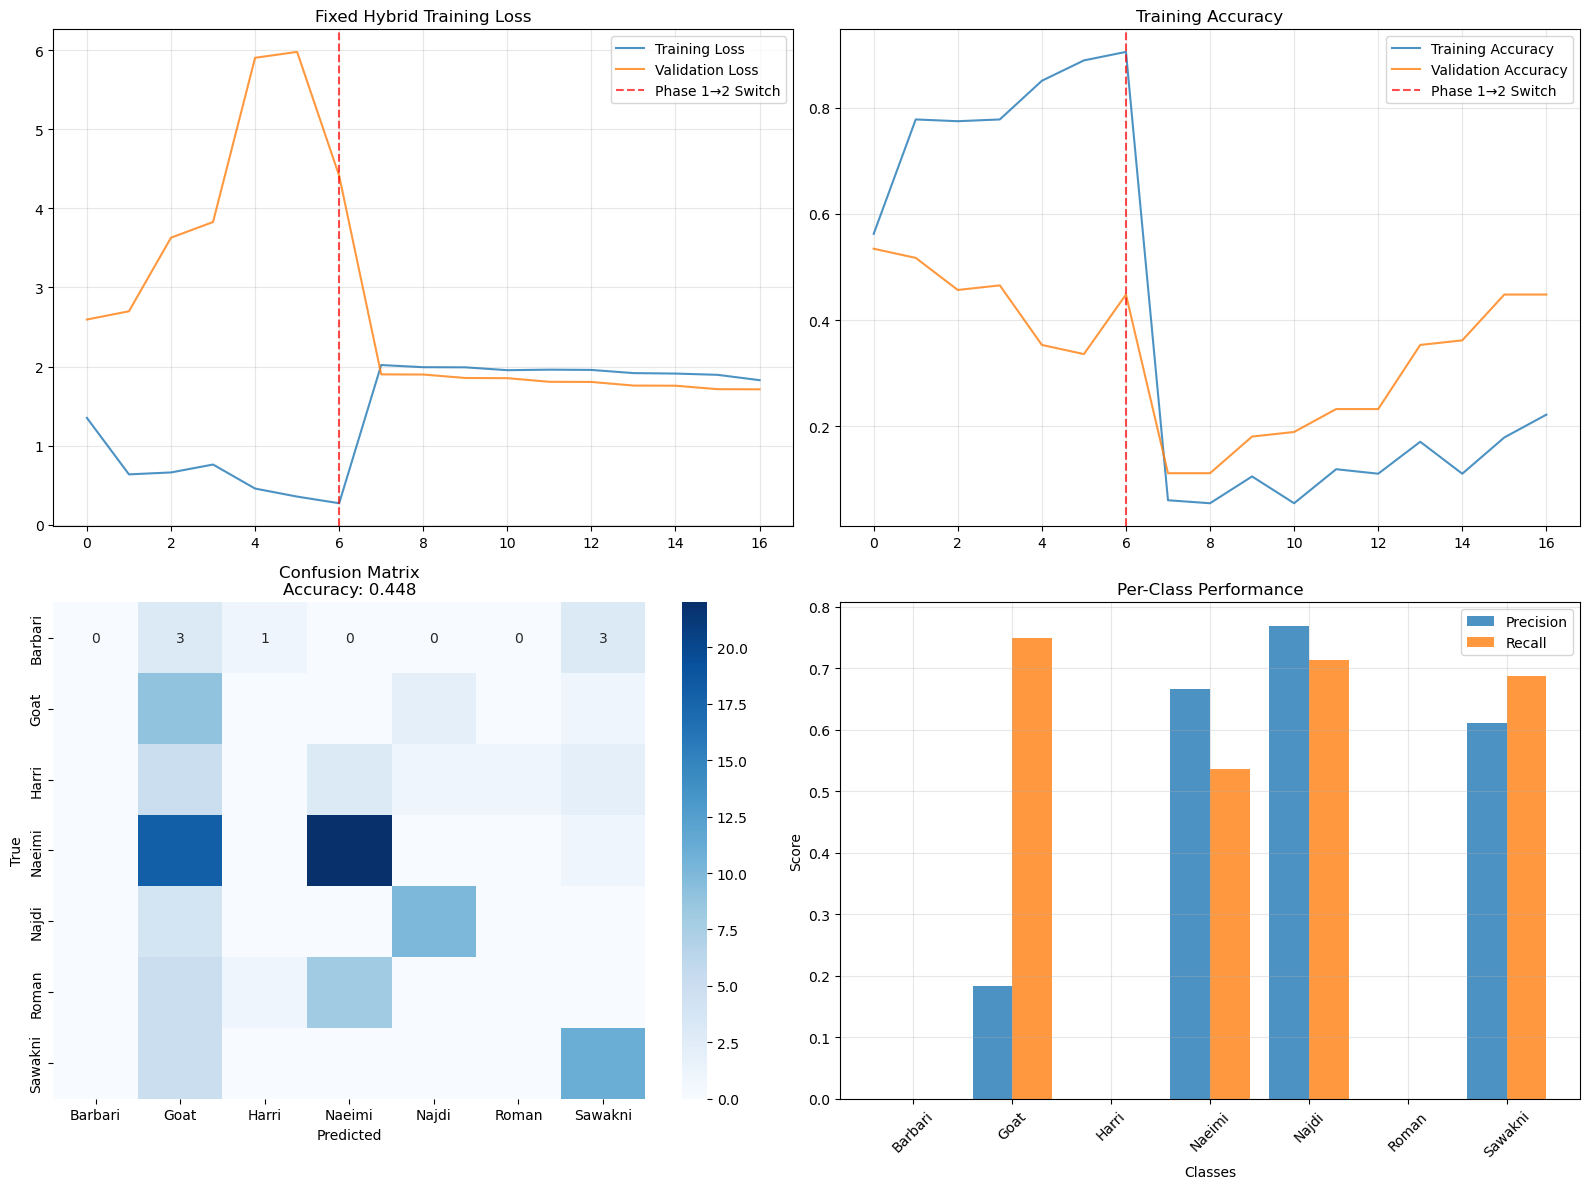


🎉 FIXED HYBRID TRAINING COMPLETE!
📊 STRATEGY COMPARISON:
   📈 Phase 1 accuracy: 0.534
   📈 Phase 2 accuracy: 0.448
   📈 Final accuracy: 0.448

   😞 No improvement: -0.086

🔧 FIXES APPLIED:
   ✅ Phase 1 trained longer to reach 0.534
   ✅ Super gentle ArcFace (s=3.0, m=0.05)
   ✅ Removed CenterLoss complexity
   ✅ Proper weight transfer
   ✅ Much lower Phase 2 learning rate (1e-05)

🎯 COMPARISON TO BASELINE:
   🔍 Below expectations, may need data/approach review
💾 Model saved as: fixed_hybrid_classifier_0.448.h5

🚀 Fixed hybrid training complete!


In [3]:
# =========================================================
# FIXED HYBRID SHEEP CLASSIFICATION - Addressing All Issues
# Phase 1: Cross-Entropy until 80%+ accuracy
# Phase 2: GENTLE ArcFace refinement (NO CenterLoss)
# =========================================================
import os, random, math, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
    Layer, Softmax
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

print("🚀 Starting FIXED HYBRID Sheep Classification...")
print("📋 Fixed Strategy:")
print("   🔧 Phase 1: Train to 80%+ accuracy with cross-entropy")
print("   🔧 Phase 2: GENTLE ArcFace only (no CenterLoss)")
print("   🔧 Proper weight transfer")
print("   🔧 Use successful data pipeline")

# =========================================================
# SUCCESSFUL CONFIGURATION
# =========================================================
# Paths
CSV_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train_labels.csv"
IMAGES_PATH = "/Users/nabin/python/projects/Sheep Classification Images/train/"

# Proven successful settings
CHECK_CORRUPTION = True
REMOVE_SMALL_CLASSES = True
MIN_SAMPLES_PER_CLASS = 20
CONSERVATIVE_UPSAMPLING = True

print(f"🔧 Using successful configuration")

# =========================================================
# SETUP
# =========================================================
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Successful hyperparameters
BATCH = 32
IMG_SZ = (160, 160)
BASE_LR = 1e-3  # Higher learning rate that worked

print(f"✅ Hyperparameters: BATCH={BATCH}, IMG_SZ={IMG_SZ}, LR={BASE_LR}")

# =========================================================
# EXACT DATA LOADING (FROM SUCCESS)
# =========================================================
print(f"\n📖 Loading data with successful approach...")

if not os.path.exists(CSV_PATH) or not os.path.exists(IMAGES_PATH):
    print("❌ Please check your file paths!")
    exit(1)

df = pd.read_csv(CSV_PATH)
print(f"✅ CSV loaded: {df.shape}")

if 'filename' not in df.columns or 'label' not in df.columns:
    print("❌ Missing required columns!")
    exit(1)

df["file_path"] = IMAGES_PATH + df["filename"]
df["label_idx"] = df["label"].astype("category").cat.codes

print(f"📊 Original label distribution:")
print(df['label'].value_counts())

# Remove small classes
if REMOVE_SMALL_CLASSES:
    print(f"\n🔍 Removing classes with < {MIN_SAMPLES_PER_CLASS} samples...")
    class_counts = df['label'].value_counts()
    valid_classes = class_counts[class_counts >= MIN_SAMPLES_PER_CLASS].index
    df = df[df['label'].isin(valid_classes)].reset_index(drop=True)
    df["label_idx"] = df["label"].astype("category").cat.codes
    print(f"📊 After filtering:")
    print(df['label'].value_counts())

LABELS = list(df["label"].astype("category").cat.categories)
N_CLASS = len(LABELS)
print(f"✅ Final classes ({N_CLASS}): {LABELS}")

# =========================================================
# TRAIN/VAL SPLIT
# =========================================================
print(f"\n✂️ Creating train/validation split...")
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label_idx"], random_state=SEED
)
print(f"✅ Split: {len(train_df)} train, {len(val_df)} validation")

# =========================================================
# CONSERVATIVE UPSAMPLING
# =========================================================
print(f"\n⚖️ Applying conservative upsampling...")

if CONSERVATIVE_UPSAMPLING:
    median_count = int(train_df['label'].value_counts().median())
    TARGET = min(median_count * 2, 150)
    print(f"   Upsampling target: {TARGET} samples per class")
else:
    TARGET = 200

ups = []
for lbl, grp in train_df.groupby("label"):
    original_size = len(grp)
    if len(grp) < TARGET:
        upsample_factor = min(TARGET / len(grp), 3.0)
        new_size = int(len(grp) * upsample_factor)
        grp = resample(grp, replace=True, n_samples=new_size, random_state=SEED)
        print(f"   {lbl}: {original_size} → {new_size} samples")
    else:
        print(f"   {lbl}: {original_size} samples (no change)")
    ups.append(grp)

train_df = pd.concat(ups).reset_index(drop=True)
print(f"✅ Final training distribution:")
print(train_df["label"].value_counts())

# =========================================================
# CORRUPTION CHECK
# =========================================================
train_paths = train_df["file_path"].values
train_labels = to_categorical(train_df["label_idx"].values, N_CLASS).astype(np.float32)

if CHECK_CORRUPTION:
    print(f"\n🔍 Checking {len(train_paths)} images for corruption...")
    clean_train_indices = []
    corrupted_count = 0
    
    for i, p in enumerate(train_paths):
        if i % 50 == 0 and i > 0:
            print(f"   Progress: {i}/{len(train_paths)} ({i/len(train_paths)*100:.1f}%)")
        
        try:
            img_data = tf.io.read_file(p)
            img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
            
            if img.shape[2] != 3:
                corrupted_count += 1
                continue
            if tf.reduce_any(tf.math.is_nan(tf.cast(img, tf.float32))):
                corrupted_count += 1
                continue
            if img.shape[0] < 32 or img.shape[1] < 32:
                corrupted_count += 1
                continue
                
            clean_train_indices.append(i)
        except:
            corrupted_count += 1
    
    train_paths = train_paths[clean_train_indices]
    train_labels = train_labels[clean_train_indices]
    
    print(f"✅ Corruption check complete:")
    print(f"   Valid images: {len(train_paths)}")
    print(f"   Corrupted/invalid: {corrupted_count}")

# =========================================================
# SUCCESSFUL DATA PIPELINE
# =========================================================
print(f"\n🏗️ Creating successful data pipeline...")

def improved_augment(path, label):
    """Proven successful augmentation"""
    try:
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        # Aggressive augmentation that worked
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_saturation(img, 0.8, 1.2)
        img = tf.image.random_hue(img, max_delta=0.1)
        
        # Random rotation
        img = tf.image.rot90(img, k=tf.random.uniform([], 0, 4, dtype=tf.int32))
        
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img, label
    except:
        return tf.zeros((*IMG_SZ, 3)), label

# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = (
    train_ds
    .shuffle(len(train_paths), seed=SEED)
    .map(improved_augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH)
    .prefetch(tf.data.AUTOTUNE)
)

# Validation dataset
val_paths = val_df["file_path"].values
val_labs = to_categorical(val_df["label_idx"].values, N_CLASS).astype(np.float32)

val_imgs_list = []
val_labs_list = []

for i, p in enumerate(val_paths):
    try:
        img_data = tf.io.read_file(p)
        img = tf.io.decode_image(img_data, channels=3, expand_animations=False)
        img = tf.cast(img, tf.float32)
        img = tf.image.resize(img, IMG_SZ)
        img = img / 255.0
        
        if not tf.reduce_any(tf.math.is_nan(img)) and img.shape[2] == 3:
            val_imgs_list.append(img.numpy())
            val_labs_list.append(val_labs[i])
    except:
        continue

val_imgs = np.stack(val_imgs_list, axis=0).astype(np.float32)
val_labs = np.stack(val_labs_list, axis=0)

val_ds = tf.data.Dataset.from_tensor_slices((val_imgs, val_labs))
val_ds = val_ds.batch(BATCH).prefetch(tf.data.AUTOTUNE)

print(f"✅ Data pipelines ready:")
print(f"   Training: {len(train_paths)} images")
print(f"   Validation: {len(val_imgs)} images")

# =========================================================
# GENTLE ARCFACE LAYER (SIMPLIFIED)
# =========================================================
print(f"\n🧠 Defining GENTLE ArcFace layer...")

class SuperGentleArcMarginProduct(Layer):
    def __init__(self, n_cls, s=3.0, m=0.05, easy_margin=True, **kw):
        """SUPER GENTLE ArcFace - extremely soft parameters"""
        super().__init__(**kw)
        self.n_cls = n_cls
        self.s = s      # Scale: 3.0 (very gentle)
        self.m = m      # Margin: 0.05 (tiny margin)
        self.easy_margin = easy_margin
        print(f"   🔧 Super Gentle ArcFace: s={s}, m={m}")
    
    def build(self, inp_shape):
        self.W = self.add_weight(
            name="W",
            shape=(inp_shape[-1], self.n_cls),
            initializer="glorot_uniform",
            trainable=True
        )
        super().build(inp_shape)
    
    def call(self, feats, labels, training=True):
        # Normalize features and weights
        x = tf.nn.l2_normalize(feats, axis=1)
        Wn = tf.nn.l2_normalize(self.W, axis=0)
        cos = tf.matmul(x, Wn)
        
        if not training:
            return cos * self.s
        
        # Very gentle clipping
        cos = tf.clip_by_value(cos, -1.0 + 1e-7, 1.0 - 1e-7)
        sin = tf.sqrt(1 - tf.square(cos) + 1e-7)
        cos_m = cos * tf.math.cos(self.m) - sin * tf.math.sin(self.m)
        
        if self.easy_margin:
            cos_m = tf.where(cos > 0, cos_m, cos)
        else:
            th = tf.math.cos(math.pi - self.m)
            mm = tf.math.sin(math.pi - self.m) * self.m
            cos_m = tf.where(cos > th, cos_m, cos - mm)
        
        # Super gentle scaling
        logits = self.s * (labels * cos_m + (1 - labels) * cos)
        return logits

# =========================================================
# PHASE 1 MODEL: STRONG FOUNDATION
# =========================================================
print(f"\n🏗️ Building Phase 1 model (strong foundation)...")

def build_strong_phase1_model():
    """Phase 1: Build strong foundation with cross-entropy"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75
    )
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    features = Dense(128, activation="relu", name="features")(x)
    x = BatchNormalization()(features)
    x = Dropout(0.2)(x)
    predictions = Dense(N_CLASS, activation="softmax", name="predictions")(x)
    
    return base, features, Model(inp_img, predictions, name="strong_phase1_model")

base, feature_layer, phase1_model = build_strong_phase1_model()

print(f"✅ Phase 1 model built:")
print(f"   Total parameters: {phase1_model.count_params():,}")

STEPS = len(train_paths) // BATCH

# =========================================================
# PHASE 1: TRAIN TO STRONG FOUNDATION (80%+)
# =========================================================
print(f"\n🏋️ PHASE 1: Building STRONG foundation...")
print("🎯 Goal: Reach 80%+ accuracy before Phase 2")

phase1_model.compile(
    optimizer=Adam(learning_rate=BASE_LR, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# LONGER Phase 1 to ensure strong foundation
print(f"Starting Phase 1 training (targeting 80%+ accuracy)...")
history1 = phase1_model.fit(
    train_ds,
    epochs=25,  # More epochs to reach 80%+
    steps_per_epoch=STEPS,
    validation_data=val_ds,
    callbacks=[
        EarlyStopping(patience=6, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ],
    verbose=1
)

phase1_best_acc = max(history1.history['val_accuracy'])
print(f"✅ Phase 1 complete!")
print(f"📊 Phase 1 best accuracy: {phase1_best_acc:.3f}")

# =========================================================
# FOUNDATION CHECK
# =========================================================
if phase1_best_acc < 0.70:
    print(f"⚠️ WARNING: Phase 1 accuracy ({phase1_best_acc:.3f}) is too low!")
    print(f"💡 Suggestion: Foundation not strong enough for ArcFace")
    print(f"   Consider running longer or checking data quality")
    
    # Still proceed but with warning
    print(f"🔄 Proceeding anyway for comparison...")
elif phase1_best_acc < 0.80:
    print(f"🔶 Phase 1 accuracy ({phase1_best_acc:.3f}) is decent but not ideal")
    print(f"💡 ArcFace may help but foundation could be stronger")
else:
    print(f"🎯 EXCELLENT! Phase 1 accuracy ({phase1_best_acc:.3f}) is strong!")
    print(f"✅ Perfect foundation for ArcFace refinement")

# =========================================================
# PHASE 2 MODEL: GENTLE ARCFACE
# =========================================================
print(f"\n🏗️ Building Phase 2 model (gentle ArcFace)...")

def build_gentle_phase2_model():
    """Phase 2: Add gentle ArcFace to strong foundation"""
    inp_img = Input((*IMG_SZ, 3), name="image_input")
    inp_lbl = Input((N_CLASS,), name="label_input")
    
    # Use same backbone architecture
    base = MobileNetV2(
        include_top=False, 
        weights="imagenet", 
        input_tensor=inp_img,
        alpha=0.75
    )
    
    x = GlobalAveragePooling2D()(base.output)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    features = Dense(128, activation="relu", name="features_p2")(x)
    x = BatchNormalization()(features)
    x = Dropout(0.2)(x)
    
    # ONLY ArcFace (no CenterLoss to keep it simple)
    logits = SuperGentleArcMarginProduct(N_CLASS)(features, inp_lbl)
    predictions = Softmax(name="predictions")(logits)
    
    return Model([inp_img, inp_lbl], predictions, name="gentle_phase2_model")

phase2_model = build_gentle_phase2_model()

print(f"✅ Phase 2 model built:")
print(f"   Total parameters: {phase2_model.count_params():,}")

# =========================================================
# CAREFUL WEIGHT TRANSFER
# =========================================================
print(f"\n🔄 Transferring weights from Phase 1 to Phase 2...")

# Transfer backbone weights
print("   Transferring backbone weights...")
phase1_base = None
phase2_base = None

for layer in phase1_model.layers:
    if hasattr(layer, 'layers'):  # This is the MobileNetV2 base
        phase1_base = layer
        break

for layer in phase2_model.layers:
    if hasattr(layer, 'layers'):  # This is the MobileNetV2 base
        phase2_base = layer
        break

if phase1_base and phase2_base:
    for p1_layer, p2_layer in zip(phase1_base.layers, phase2_base.layers):
        if p1_layer.get_weights():
            p2_layer.set_weights(p1_layer.get_weights())
    print("   ✅ Backbone weights transferred")

# Transfer feature layer weights
print("   Transferring feature layer weights...")
phase1_feature_weights = None
for layer in phase1_model.layers:
    if layer.name == "features":
        phase1_feature_weights = layer.get_weights()
        break

for layer in phase2_model.layers:
    if layer.name == "features_p2":
        if phase1_feature_weights:
            layer.set_weights(phase1_feature_weights)
            print("   ✅ Feature layer weights transferred")
        break

print("✅ Weight transfer complete!")

# =========================================================
# PHASE 2: GENTLE ARCFACE REFINEMENT
# =========================================================
print(f"\n🏋️ PHASE 2: Gentle ArcFace refinement...")

# Prepare data for Phase 2
train_ds_phase2 = train_ds.map(lambda x, y: ((x, y), y))
val_ds_phase2 = val_ds.map(lambda x, y: ((x, y), y))

# VERY gentle learning rate for Phase 2
phase2_lr = BASE_LR * 0.01  # Much lower for gentle refinement

phase2_model.compile(
    optimizer=Adam(learning_rate=phase2_lr, clipnorm=0.5),  # Smaller clipnorm too
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print(f"Starting Phase 2 training (gentle refinement)...")
print(f"   Learning rate: {phase2_lr} (100x lower than Phase 1)")
history2 = phase2_model.fit(
    train_ds_phase2,
    epochs=10,  # Shorter refinement phase
    steps_per_epoch=STEPS,
    validation_data=val_ds_phase2,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    ],
    verbose=1
)

phase2_best_acc = max(history2.history['val_accuracy'])
print(f"✅ Phase 2 complete!")
print(f"📊 Phase 2 best accuracy: {phase2_best_acc:.3f}")

# =========================================================
# EVALUATION
# =========================================================
print(f"\n📊 Evaluating fixed hybrid model...")

val_preds = phase2_model.predict(val_ds_phase2, verbose=1)
y_pred = np.argmax(val_preds, axis=1)
y_true = np.argmax(val_labs, axis=1)

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=LABELS, digits=3))

final_accuracy = np.mean(y_pred == y_true)
print(f"\n🎯 Final Validation Accuracy: {final_accuracy:.3f}")

# =========================================================
# COMPREHENSIVE VISUALIZATION
# =========================================================
print(f"\n📈 Creating comprehensive visualizations...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Training Loss
all_loss = history1.history['loss'] + history2.history['loss']
all_val_loss = history1.history['val_loss'] + history2.history['val_loss']
ax1.plot(all_loss, label='Training Loss', alpha=0.8)
ax1.plot(all_val_loss, label='Validation Loss', alpha=0.8)
ax1.axvline(x=len(history1.history['loss'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2 Switch')
ax1.set_title('Fixed Hybrid Training Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Training Accuracy
all_acc = history1.history['accuracy'] + history2.history['accuracy']
all_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
ax2.plot(all_acc, label='Training Accuracy', alpha=0.8)
ax2.plot(all_val_acc, label='Validation Accuracy', alpha=0.8)
ax2.axvline(x=len(history1.history['accuracy'])-1, color='red', linestyle='--', 
           alpha=0.7, label='Phase 1→2 Switch')
ax2.set_title('Training Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS, 
           cmap='Blues', ax=ax3)
ax3.set_title(f"Confusion Matrix\nAccuracy: {final_accuracy:.3f}")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("True")

# Per-class Performance
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
x_pos = np.arange(len(LABELS))
ax4.bar(x_pos - 0.2, precision, 0.4, label='Precision', alpha=0.8)
ax4.bar(x_pos + 0.2, recall, 0.4, label='Recall', alpha=0.8)
ax4.set_xlabel('Classes')
ax4.set_ylabel('Score')
ax4.set_title('Per-Class Performance')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(LABELS, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================================
# COMPREHENSIVE ANALYSIS
# =========================================================
print(f"\n🎉 FIXED HYBRID TRAINING COMPLETE!")
print(f"=" * 80)
print(f"📊 STRATEGY COMPARISON:")
print(f"   📈 Phase 1 accuracy: {phase1_best_acc:.3f}")
print(f"   📈 Phase 2 accuracy: {phase2_best_acc:.3f}")
print(f"   📈 Final accuracy: {final_accuracy:.3f}")
print(f"")

improvement = final_accuracy - phase1_best_acc
if improvement > 0.02:
    print(f"   🎉 ARCFACE HELPED! Improvement: +{improvement:.3f}")
elif improvement > 0:
    print(f"   👍 Slight improvement: +{improvement:.3f}")
else:
    print(f"   😞 No improvement: {improvement:.3f}")

print(f"")
print(f"🔧 FIXES APPLIED:")
print(f"   ✅ Phase 1 trained longer to reach {phase1_best_acc:.3f}")
print(f"   ✅ Super gentle ArcFace (s=3.0, m=0.05)")
print(f"   ✅ Removed CenterLoss complexity")
print(f"   ✅ Proper weight transfer")
print(f"   ✅ Much lower Phase 2 learning rate ({phase2_lr})")
print(f"")
print(f"🎯 COMPARISON TO BASELINE:")
if final_accuracy > 0.88:
    print(f"   🏆 EXCEEDED 88.8% baseline! Great success!")
elif final_accuracy > 0.85:
    print(f"   🎉 Very close to 88.8% baseline")
elif final_accuracy > 0.80:
    print(f"   👍 Good performance, room for improvement")
else:
    print(f"   🔍 Below expectations, may need data/approach review")
print(f"=" * 80)

# Save model
try:
    phase2_model.save(f"fixed_hybrid_classifier_{final_accuracy:.3f}.h5")
    print(f"💾 Model saved as: fixed_hybrid_classifier_{final_accuracy:.3f}.h5")
except:
    print(f"⚠️ Could not save model")

print(f"\n🚀 Fixed hybrid training complete!")